<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 136.8 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
print("--- Dataset Information ---")
print(df.info())

print("\n--- Summary Statistics (Numerical) ---")
print(df.describe())

print("\n--- Summary Statistics (Categorical) ---")
print(df.describe(include='object'))

--- Dataset Information ---
<class 'pandas.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), str(100)
memory usage: 56.9 MB
None

--- Summary Statistics (Numerical) ---
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000  

/tmp/ipykernel_1533/255797499.py:9: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  print(df.describe(include='object'))


                            MainBranch              Age           Employment  \
count                            65437            65437                65437   
unique                               5                8                  110   
top     I am a developer by profession  25-34 years old  Employed, full-time   
freq                             50207            23911                39041   

                                  RemoteWork   Check CodingActivities  \
count                                  54806   65437            54466   
unique                                     3       1              118   
top     Hybrid (some remote, some in-person)  Apples            Hobby   
freq                                   23015   65437             9993   

                                             EdLevel  \
count                                          60784   
unique                                             8   
top     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
freq     

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here

missing_counts = df.isnull().sum()
print("Missing values per column (Top 10):")
print(missing_counts.sort_values(ascending=False).head(10))

Missing values per column (Top 10):
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



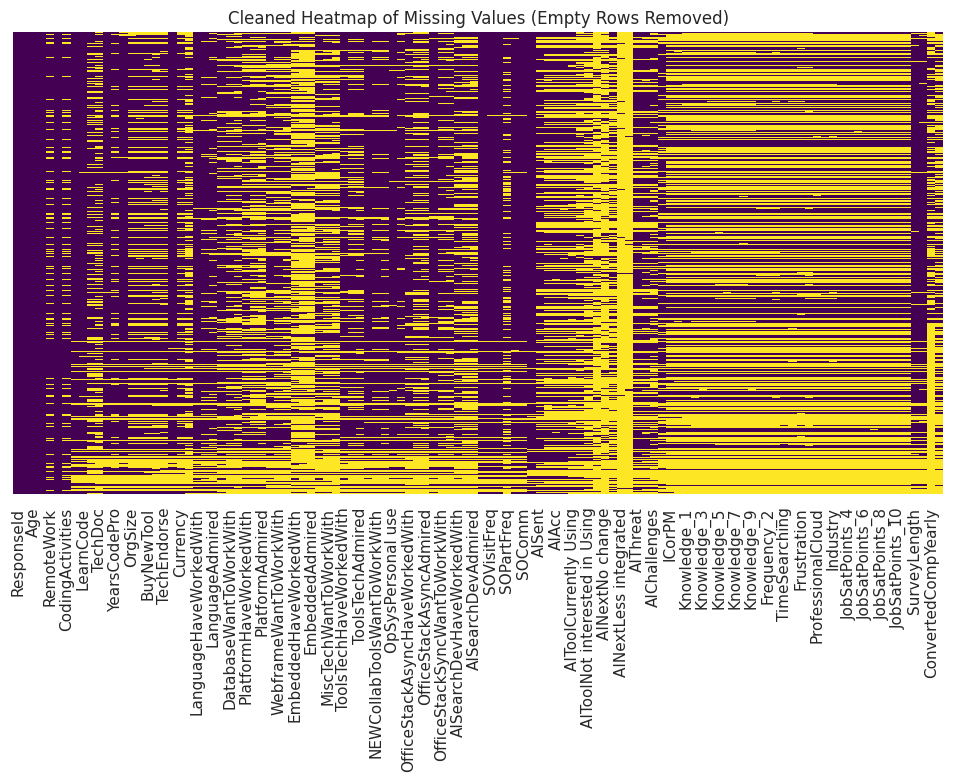

In [12]:
## Write your code here

df.dropna(how='all', inplace=True)

plt.figure(figsize=(12, 6))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.title('Cleaned Heatmap of Missing Values (Empty Rows Removed)')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [7]:
## Write your code here
# Count how many gaps we have in the Employment column
missing_employment = df['Employment'].isnull().sum()
print(f"Number of missing rows in Employment: {missing_employment}")


Number of missing rows in Employment: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [8]:
## Write your code here

employment_mode = df['Employment'].mode()[0]
print(f"The most frequent employment status is: {employment_mode}")

The most frequent employment status is: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [9]:
## Write your code here

df['Employment'] = df['Employment'].fillna(employment_mode)

print(f"Missing values in Employment after imputation: {df['Employment'].isnull().sum()}")

Missing values in Employment after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


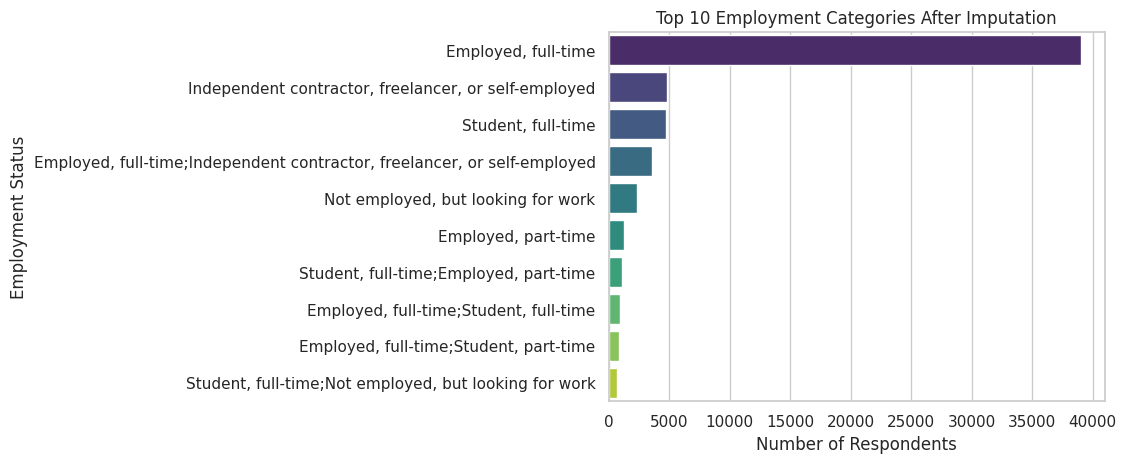

In [11]:
## Write your code here
top_10_emp = df['Employment'].value_counts().head(10)

# Create the plot using the top 10 data
sns.barplot(x=top_10_emp.values, y=top_10_emp.index, hue=top_10_emp.index, palette='viridis', legend=False)

plt.title('Top 10 Employment Categories After Imputation')
plt.xlabel('Number of Respondents')
plt.ylabel('Employment Status')

plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
